In [32]:
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

allowed_color = 'Green'
polylog_color = 'Black'
noyhat_color = 'Orange'
giantstep_color = 'Blue'
notallowed_color = 'Red'
processnotdefined_color = 'Purple'
sweetspot_color = 'cyan'

In [33]:
from giant_learning.poly_poly import ProjectedH3H3Overlaps
from giant_learning.gradient_descent import ProjectedGradientDescent

import numpy as np
from sklearn.preprocessing import normalize
from scipy.linalg import orth

p = 1
k = 1
d = 2**10
T = 100
noise = 1e-6
n = int(np.power(d,1.3))
n = int(np.power(d,1.85))
t = 1./np.sqrt(d)  
gamma = .05 * n * p * np.power(d,-3/2)
seed = 1

target = ProjectedH3H3Overlaps._target
activation = ProjectedH3H3Overlaps._activation
activation_derivative = ProjectedH3H3Overlaps._activation_derivative
offdiag = (False if n == 1 else True)


sim_plainsgd_test_errors = np.zeros((T+1))
sim_correlationsgd_test_errors = np.zeros((T+1))
sim_adaptivesgd_test_errors = np.zeros((T+1))
theo_plainsgd_test_errors = np.zeros((T+1))
theo_correlationsgd_test_errors = np.zeros((T+1))
theo_adaptivesgd_test_errors = np.zeros((T+1))

## Initial conditions
rng = np.random.default_rng(seed+1)
Wtarget = orth((normalize(rng.normal(size=(k,d)), axis=1, norm='l2')).T).T
Wtild = normalize(rng.normal(size=(p,d)), axis=1, norm='l2')
Wtild_target = np.einsum('ji,ri,rh->jh', Wtild , Wtarget ,Wtarget)
W0_orth =  normalize(Wtild - Wtild_target, axis=1, norm='l2')
W0 = (t*normalize(Wtild_target,norm='l2',axis=1) + np.sqrt(1-t**2)*W0_orth)
a0 = np.ones(p) ### It is changed with the new version of the package. The 1/p is included in giant-learning ###

P = Wtarget @ Wtarget.T
M0 = W0 @ Wtarget.T
Q0 = W0 @ W0.T

if M0[0,0] < 0:
    W0 = -W0
    M0 = -M0

print(f'P = {P}')
print(f'M0 = {M0}')
print(f'Q0 = {Q0}')

gd_plain = ProjectedGradientDescent(
    target, Wtarget, n,
    activation, W0, a0, activation_derivative,
    gamma, noise, predictor_interaction=True,
    test_size = None, analytical_error= 'H3H3'
)

gd_corr = ProjectedGradientDescent(
    target, Wtarget, n,
    activation, W0, a0, activation_derivative,
    gamma, noise, predictor_interaction=False,
    test_size = None, analytical_error= 'H3H3',
)

gd_adaptive = ProjectedGradientDescent(
    target, Wtarget, n,
    activation, W0, a0, activation_derivative,
    gamma, noise, predictor_interaction='adaptive',
    test_size = None, analytical_error= 'H3H3'
)

gd_adaptive._adaptive_percentage_threshold = 0.6
gd_adaptive._adaptive_switch_lr_jump = .1


gd_plain.train(T, verbose = True)
gd_corr.train(T, verbose = True)
gd_adaptive.train(T, verbose = True)

sim_plainsgd_test_errors = np.array(gd_plain.test_errors)
sim_correlationsgd_test_errors = np.array(gd_corr.test_errors)
sim_adaptivesgd_test_errors = np.array(gd_adaptive.test_errors)


## Theoretical predictions
theo_plain = ProjectedH3H3Overlaps(
    P, M0, Q0, a0,
    gamma, noise,
    I4_diagonal=d/n, I4_offdiagonal=offdiag,
    predictor_interaction=True
)

theo_corr = ProjectedH3H3Overlaps(
    P, M0, Q0, a0,
    gamma, noise,
    I4_diagonal=d/n, I4_offdiagonal=offdiag,
    predictor_interaction=False
)

theo_adaptive = ProjectedH3H3Overlaps(
    P, M0, Q0, a0,
    gamma, noise,
    I4_diagonal=d/n, I4_offdiagonal=offdiag,
    predictor_interaction='adaptive'
)

theo_plain.train(T, verbose = True)
theo_corr.train(T, verbose = True)
theo_adaptive.train(T, verbose = True)

theo_plainsgd_test_errors = np.array(theo_plain.test_errors)
theo_correlationsgd_test_errors = np.array(theo_corr.test_errors)
theo_adaptivesgd_test_errors = np.array(theo_adaptive.test_errors)




P = [[1.]]
M0 = [[0.03125]]
Q0 = [[1.]]


100%|██████████| 100/100 [00:00<00:00, 11869.78it/s]


True 5.006057857137591e-07 8.343683695608069e-08
[5.99981739453123, 5.99973390879274, 5.994509378261117, 5.941498463988521, 5.046888760924576, 0.7906610667398111, 0.235734147786824, 0.010349701041080017, 0.0004262372129164582, 1.8672526443719306e-05, 1.184636580831011e-06, 5.315500444247334e-07, 5.026347031922285e-07, 5.016506152699662e-07, 5.013075856652449e-07, 5.012678259141978e-07, 5.013682051746571e-07, 5.012528774273051e-07, 5.013435218081952e-07, 5.013736328329799e-07, 5.012840564866394e-07, 5.013257471375709e-07, 5.013317845303789e-07, 5.011815988886781e-07, 5.012446688823502e-07, 5.012054713482428e-07, 5.012655122094145e-07, 5.011772281626747e-07, 5.012591990372073e-07, 5.012021886408036e-07, 5.010654948733873e-07, 5.012625243772106e-07, 5.011402621768468e-07, 5.011214887495896e-07, 5.010878521005679e-07, 5.011142869548735e-07, 5.011223764839201e-07, 5.01235031258318e-07, 5.010941745986486e-07, 5.010010339923099e-07, 5.011048380687555e-07, 5.011095711715541e-07, 5.010798567184

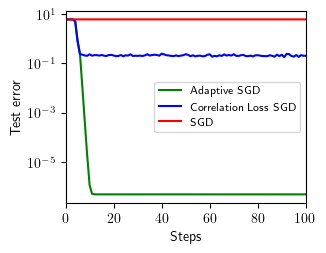

In [34]:
fig, ax = plt.subplots(1,1,figsize=(3.1,2.5))

print(gd_adaptive.predictor_interaction, gd_adaptive.test_errors[-1], gd_adaptive.test_errors[-1]/gd_adaptive.test_errors[0])
print(gd_adaptive.test_errors)

R0 = 1.0
ax.plot(sim_adaptivesgd_test_errors/R0, label=f'Adaptive SGD', marker='', ls='-', color='green')
ax.plot(sim_correlationsgd_test_errors/R0, label=f'Correlation Loss SGD', marker='', ls='-', color='blue')
ax.plot(sim_plainsgd_test_errors/R0, label=f'SGD', marker='', ls='-', color='red')

# ax.plot(theo_adaptivesgd_=f'Adaptive SGD Theory', marker='', linestyle='-', color='green')
# ax.plot(theo_correlationsgd_test_errors, label=f'Correlation Loss SGD Theory', marker='', linestyle='-', color='blue')
# ax.plot(theo_plainsgd_test_errors, label=f'SGD test_errors, labelTheory', marker='', linestyle='-', color='red')

# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Steps')
ax.set_ylabel('Test error')
ax.set_xlim([0,100])
# ax.set_ylim([1e-2,1e1])
ax.legend(fontsize=8, loc='center right')

plt.savefig('figures/adaptive_SGD.pdf', bbox_inches = 'tight')

